<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%204/LabAssignment4_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Deep Learning


*   Lab Manual: [Manual Lab 4](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%204/Lab_Assignment_4.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)

# Importing Libraries

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers

# Loading Dataset

In [120]:
# load training dataset
x_train = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_train.csv")
y_train = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_train.csv")

x_train = np.array(x_train)
y_train = np.array(y_train)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)

#Load testing dataset

x_test = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_test.csv")
y_test = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_test.csv")

x_test = np.array(x_test)
y_test = np.array(y_test)

sc = StandardScaler()
x_test = sc.fit_transform(x_test)

#loading validation dataset
x_val = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_valid.csv")
y_val = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_valid.csv")

x_val = np.array(x_val)
y_val = np.array(y_val)

sc = StandardScaler()
x_val = sc.fit_transform(x_val)

# Modelwise General Implementation 

In [3]:
def model1():
  model = Sequential()
  mse = []
  model.add(Dense(5,input_dim=4, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

In [4]:
def model2():
  model = Sequential()
  mse = []
  model.add(Dense(10,input_dim=4, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

In [5]:
def model3():
  model = Sequential()
  model.add(Dense(5,input_dim=4, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

# Que 1

## Model 1

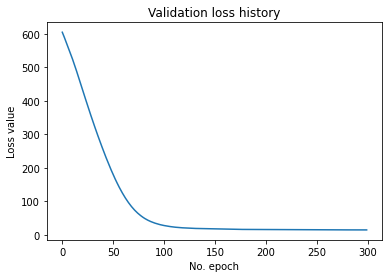

Training MSE: 14.75821590423584
Testing MSE : 15.300559043884277


In [ ]:
model = model1()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model1 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model1.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

## Model 2

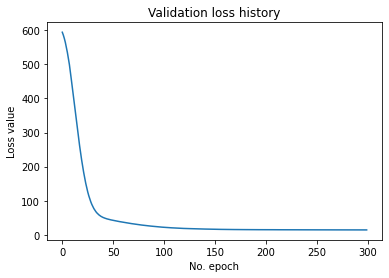

Training MSE: 14.411979675292969
Testing MSE : 14.726624488830566


In [ ]:
model = model2()

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model2 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model2.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

## Model 3

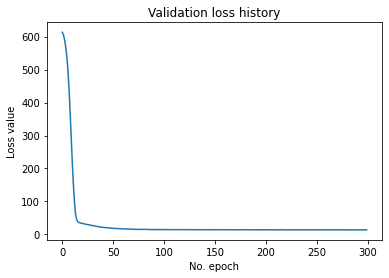

Training MSE: 13.657844543457031
Testing MSE : 14.955949783325195


In [ ]:
model = model3()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model3.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

# Que 2

## General KFOLD cross entropy function

In [ ]:
def k_Fold(epochs,num_folds,x_train,x_val,y_train,y_val,modelNo):
  
  lossPerFold = []
  final_mse = []
  
  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]

  # shuffler = np.random.permutation(len(inputs))
  # inputs = inputs[shuffler]
  # targets = targets[shuffler]
  kfold = KFold(n_splits=num_folds, shuffle=True)

  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    mse = []
    if (modelNo == 1):
      model = model1()
    elif (modelNo == 2):
      model = model2()
    else:
      model = model3()
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #for k in range(epochs):
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))
    #scores = model.evaluate(inputs[test], targets[test], verbose=0)
    #mse.append(scores[1])
      
    # Generate generalization metrics
    
    final_mse.append(history_model1.history['val_mse']);
    lossPerFold.append(final_mse[fold_no-1][epochs-1])
    print(f'[{modelNo}] Score for fold {fold_no}: {model.metrics_names[1]} of {final_mse[fold_no-1][epochs-1]}')
    # Increase fold number
    fold_no = fold_no + 1

  
  # == Provide average scores ==
  print('[{}] Average scores for all folds: {}'.format(modelNo,np.mean(lossPerFold)))
  return final_mse

## Model 1

In [ ]:
epochs_model1 = 300
epochs_model2 = 300
epochs_model3 = 300
folds = 10 

# Last argument stands for the model number
ans1 = k_Fold(epochs_model1,folds,x_train,x_val,y_train,y_val,1); 

[1] Score for fold 1: mse of 17.299606323242188
[1] Score for fold 2: mse of 18.185937881469727
[1] Score for fold 3: mse of 11.583671569824219
[1] Score for fold 4: mse of 13.402042388916016
[1] Score for fold 5: mse of 31.521080017089844
[1] Score for fold 6: mse of 10.645840644836426
[1] Score for fold 7: mse of 16.65315055847168
[1] Score for fold 8: mse of 16.76543617248535
[1] Score for fold 9: mse of 11.134197235107422
[1] Score for fold 10: mse of 13.324420928955078
[1] Average scores for all folds: 16.051538372039794


## Model 2

In [ ]:
ans2 = k_Fold(epochs_model2,folds,x_train,x_val,y_train,y_val,2); 

[2] Score for fold 1: mse of 13.347832679748535
[2] Score for fold 2: mse of 12.78521728515625
[2] Score for fold 3: mse of 12.212196350097656
[2] Score for fold 4: mse of 6.805118083953857
[2] Score for fold 5: mse of 21.046159744262695
[2] Score for fold 6: mse of 9.850756645202637
[2] Score for fold 7: mse of 20.81561851501465
[2] Score for fold 8: mse of 14.825030326843262
[2] Score for fold 9: mse of 17.322650909423828
[2] Score for fold 10: mse of 30.119583129882812
[2] Average scores for all folds: 15.913016366958619


## Model 3

In [ ]:
ans3 = k_Fold(300,10,x_train,x_val,y_train,y_val,3); 

[3] Score for fold 1: mse of 15.459888458251953
[3] Score for fold 2: mse of 13.214339256286621
[3] Score for fold 3: mse of 19.502769470214844
[3] Score for fold 4: mse of 27.03596305847168
[3] Score for fold 5: mse of 6.783481121063232
[3] Score for fold 6: mse of 10.587632179260254
[3] Score for fold 7: mse of 15.553061485290527
[3] Score for fold 8: mse of 7.312789440155029
[3] Score for fold 9: mse of 12.318994522094727
[3] Score for fold 10: mse of 32.225059509277344
[3] Average scores for all folds: 15.99939785003662


## Collecing Result and Plot

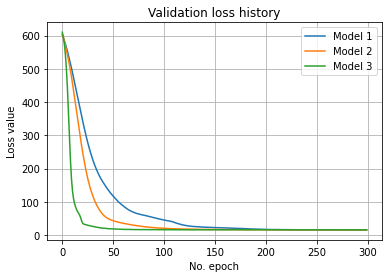

In [ ]:
plt.grid()
plt.plot(np.mean(ans1, axis=0))
plt.plot(np.mean(ans2, axis=0))
plt.plot(np.mean(ans3, axis=0))
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['Model 1','Model 2','Model 3'])
plt.show()

# Que 3


## Model 1

In [87]:
from tensorflow.python.keras import regularizers
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
mse_val = []
MSE = []
num_folds = 10
epochs = 130
for i in range(len(lemda)):
  per_fold_mse = []
  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  final_mse = []
  for train, test in kfold.split(inputs, targets):
    print('\r',fold_no,end=' ')
    model = Sequential()
    model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=5,validation_data=(inputs[test],targets[test]))    
    final_mse.append(history_model1.history['val_mse'][epochs-1]);
    per_fold_mse.append(history_model1.history['val_mse'])
    fold_no = fold_no + 1

  MSE.append(np.mean(per_fold_mse,axis=0))
  mse_val.append(np.mean(final_mse))
  print("Validation MSE: {}".format(mse_val[i]))

 10 Validation MSE: 17.250331592559814
 10 Validation MSE: 16.68267865180969
 10 Validation MSE: 16.745320510864257
 10 Validation MSE: 18.161507225036623
 10 Validation MSE: 16.491950130462648
 10 Validation MSE: 16.28281717300415
 10 Validation MSE: 16.676392459869383


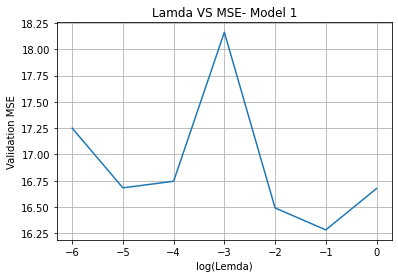

In [88]:
plt.grid()
plt.plot(np.log10(lemda),mse_val)
plt.title('Lamda VS MSE- Model 1')
plt.ylabel('Validation MSE')
plt.xlabel('log(Lemda)')
plt.show()

### Calculating epochs vs MSE for best alpha 

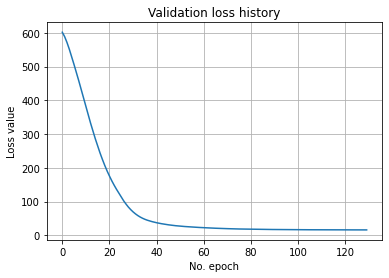

In [89]:
index = np.argmin(mse_val)
plt.grid()
plt.plot(MSE[index])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

## Model 2

In [68]:
from tensorflow.python.keras import regularizers
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50]
mse_val = []
MSE = []
num_folds = 10
epochs = 150
for i in range(len(lemda)):
  per_fold_mse = []
  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  final_mse = []
  for train, test in kfold.split(inputs, targets):
    print('\r',fold_no,end=' ')
    model = Sequential()
    model.add(Dense(10,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=20,validation_data=(inputs[test],targets[test]))    
    final_mse.append(history_model1.history['val_mse'][epochs-1]);
    per_fold_mse.append(history_model1.history['val_mse'])
    fold_no = fold_no + 1

  MSE.append(np.mean(per_fold_mse,axis=0))
  mse_val.append(np.mean(final_mse))
  print("Validation MSE: {}".format(mse_val[i]))

 10 Validation MSE: 25.390715408325196
 10 Validation MSE: 23.47150068283081
 10 Validation MSE: 27.313182067871093
 10 Validation MSE: 26.068257904052736
 10 Validation MSE: 77.35636758804321
 10 Validation MSE: 26.889880084991454
 10 Validation MSE: 29.882778072357176
 10 Validation MSE: 45.0443977355957
 10 Validation MSE: 219.83375854492186


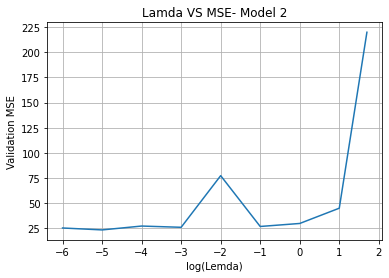

In [69]:
plt.grid()
plt.plot(np.log10(lemda),mse_val)
plt.title('Lamda VS MSE- Model 2')
plt.ylabel('Validation MSE')
plt.xlabel('log(Lemda)')
plt.show()

### Calculating epochs vs MSE for best alpha 

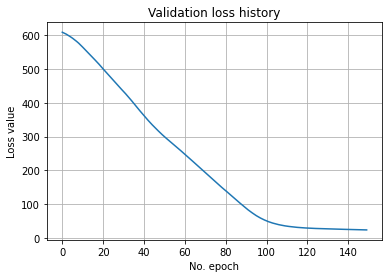

In [70]:
index = np.argmin(mse_val)
plt.grid()
plt.plot(MSE[index])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

## Model 3

In [71]:
from tensorflow.python.keras import regularizers
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
mse_val = []
MSE = []
num_folds = 10
epochs = 200
for i in range(len(lemda)):
  per_fold_mse = []
  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  final_mse = []
  for train, test in kfold.split(inputs, targets):
    print('\r',fold_no,end=' ')
    model = Sequential()
    model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(10,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data=(inputs[test],targets[test]))    
    final_mse.append(history_model1.history['val_mse'][epochs-1]);
    per_fold_mse.append(history_model1.history['val_mse'])
    fold_no = fold_no + 1

  MSE.append(np.mean(per_fold_mse,axis=0))
  mse_val.append(np.mean(final_mse))
  print("Validation MSE: {}".format(mse_val[i]))

 10 Validation MSE: 138.48283014297485
 10 Validation MSE: 16.607347774505616
 10 Validation MSE: 64.43212852478027
 10 Validation MSE: 16.885844230651855
 10 Validation MSE: 76.98313064575196
 10 Validation MSE: 66.46438107490539
 10 Validation MSE: 16.026478052139282
 10 Validation MSE: 25.505281829833983


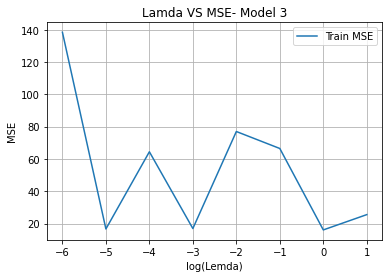

In [72]:
plt.grid()
plt.plot(np.log10(lemda),mse_val)
plt.title('Lamda VS MSE- Model 3')
plt.ylabel('MSE')
plt.xlabel('log(Lemda)')
plt.legend(['Train MSE','Test MSE'])
plt.show()

### Calculating epochs vs MSE for best alpha 

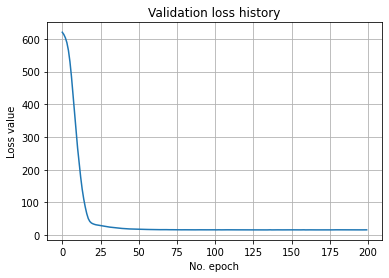

In [73]:
index = np.argmin(mse_val)
plt.grid()
plt.plot(MSE[index])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Que: 4

## Overfit vs Underfit

Below I have implemented the code for complexity vs MSE. When j = 0, it will have 0 hidden layer, when j = 1 it will have 1 hidden layer with 100 nodes.

In summary we have,
* 0: No hidden Layer
* 1: 1 hidden layer with 100 nodes
* 2: 2 hiddin layer with 150 nodes each
* 3: 3 hiddin layer with 200 nodes each
* 4: 4 hiddin layer with 250 nodes each
* 5: 5 hiddin layer with 300 nodes each 
and so on upto
* 8: 8 hidden layer with 350 nodes each

In [150]:
mse_train = []
mse_test = []
total_layer = 8
for j in range(0,total_layer):
  model = Sequential()
  if (j == 0):
    model.add(Dense(1,input_dim=4, activation='relu'))
  else :
    model.add(Dense(100,input_dim=4, activation='relu'))
    for i in range(j-1):
      model.add(Dense(100+i*50, activation='relu'))
    model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  model.compile(loss='mse', optimizer='adam', metrics=['mse'])
  history_model3 = model.fit(x_train, y_train, epochs=150, batch_size=40,verbose=0)

  mse_train.append(model.evaluate(x_train,y_train,verbose=0)[1])
  mse_test.append(model.evaluate(x_test,y_test,verbose=0)[1])

  print("Hidden Layer Count: [{}] => Training MSE: {}".format(j,mse_train[j]))
  print("Hidden Layer Count: [{}] => Testing MSE : {}".format(j,mse_test[j]))

Hidden Layer Count: [0] => Training MSE: 499.5497131347656
Hidden Layer Count: [0] => Testing MSE : 457.6534118652344
Hidden Layer Count: [1] => Training MSE: 19.785242080688477
Hidden Layer Count: [1] => Testing MSE : 23.5435733795166
Hidden Layer Count: [2] => Training MSE: 14.143624305725098
Hidden Layer Count: [2] => Testing MSE : 14.820703506469727
Hidden Layer Count: [3] => Training MSE: 12.49379825592041
Hidden Layer Count: [3] => Testing MSE : 13.642813682556152
Hidden Layer Count: [4] => Training MSE: 10.240796089172363
Hidden Layer Count: [4] => Testing MSE : 13.480643272399902
Hidden Layer Count: [5] => Training MSE: 9.114233016967773
Hidden Layer Count: [5] => Testing MSE : 13.458046913146973
Hidden Layer Count: [6] => Training MSE: 8.2169828414917
Hidden Layer Count: [6] => Testing MSE : 14.554141998291016
Hidden Layer Count: [7] => Training MSE: 7.410175323486328
Hidden Layer Count: [7] => Testing MSE : 14.797318458557129


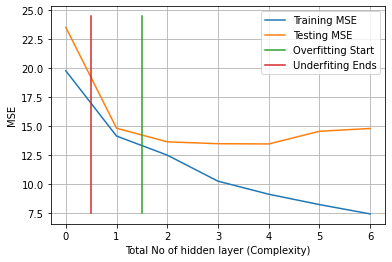

In [160]:
diff = abs(np.array(mse_train)-np.array(mse_test))
index = np.argmin(diff)-1
plt.plot(mse_train[1:len(mse_train)])
plt.plot(mse_test[1:len(mse_train)])
d = np.arange(7.5,25)
plt.plot([index+0.5]*len(d),d)
plt.plot([index-0.5]*len(d),d)
plt.grid()
plt.legend(['Training MSE','Testing MSE','Overfitting Start','Underfiting Ends'])
plt.xlabel('Total No of hidden layer (Complexity)')
plt.ylabel('MSE')
plt.show()


As you can see, as the model complexity increases, trainng error as well as testing error decreses.This is called as **UNDER FITTING** But after some point, as the model complexity increases, the training complexity decreases but the testing complexity increses. This is called as **OVER FITTING.**

## MSE vs Epochs to show underfit and Overfit

### Underfit

Hidden Layer Count: [0] => Training MSE: 573.1572265625
Hidden Layer Count: [0] => Testing  MSE: 591.5865478515625


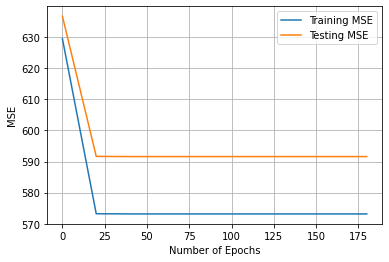

In [212]:
epochs = 200
gaps = 20
index = np.arange(0,epochs,gaps)
model = Sequential()
model.add(Dense(1,input_dim=4, activation='tanh'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=epochs, batch_size=10,verbose=0,validation_data=(x_val,y_val))
print("Hidden Layer Count: [0] => Training MSE: {}".format(history_model3.history['mse'][epochs-1]))
print("Hidden Layer Count: [0] => Testing  MSE: {}".format(history_model3.history['val_mse'][epochs-1]))

plt.plot(index,history_model3.history['mse'][0::gaps])
plt.plot(index,history_model3.history['val_mse'][0::gaps])
plt.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend(['Training MSE','Testing MSE'])
plt.show()

### Overfit

In [ ]:
epochs = 300
gaps = 10
index = np.arange(0,epochs,gaps)
model = Sequential()
model.add(Dense(100,input_dim=4, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))
model.get_layer(index=0)
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.005),metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=epochs, batch_size=10,verbose=0,validation_split=0.1)
print("Hidden Layer Count: [0] => Training MSE: {}".format(history_model3.history['mse'][epochs-1]))
print("Hidden Layer Count: [0] => Testing  MSE: {}".format(history_model3.history['val_mse'][epochs-1]))



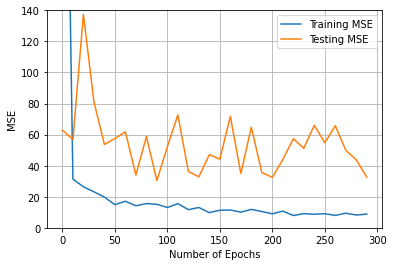

In [225]:
plt.plot(index,history_model3.history['mse'][0::gaps])
plt.plot(index,history_model3.history['val_mse'][0::gaps])
plt.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend(['Training MSE','Testing MSE'])
plt.ylim([0,140])
plt.show()

# Analysis



1. In quetion 1, we found out that increasing model complexity leads to speedy saturation of the MSE. Final MSE of all three model is around 13-15 units but model 1 takes 100 epochs, model 2 takes 50  epochs and model 3 takes 20 epochs. Thus model 3 performs better. 
2. In question 2, we found almost similiar trend compare to quetion 1 and graphs are self explainary
3. In question 3, we analysied different range of lamda on all models and calculated the MSE. After that we plot the Epochs vs MSE graph on optimised alpha.
4. I have plotted the graph model complexity vs train/test MSE which clearly shows the overfitting and underfitting concepts. For more, [Graph](https://dziganto.github.io/assets/images/bias-variance-tradeoff.png?raw=true). We also analyzed the the epochs vs MSE. In the first graph, since it is an underfitting we found both MSE to be very high. In the second graph, since it is an overfitting, after some epochs validation MSE increses and training MSE decreases.

